# Código utilizado para resolver la sección b) del Problema 2 (Tarea 1)

In [1]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%pylab inline


#Calculamos cuantas veces se observa X=18 si repetimos el experimento 1000 veces

same=[]
for i in range(1000):
            x = np.random.random(33)
            s=0
            for n in range(33):
                if x[n] < 0.5:
                    s=s+1    
            same.append(s)
same = np.array(same)
index = (same > 17) & (same < 19)
same18 = same[index]
    
    
print "cantidad de veces que se observa X=18:",len(same18)
                




Populating the interactive namespace from numpy and matplotlib
cantidad de veces que se observa X=18: 132


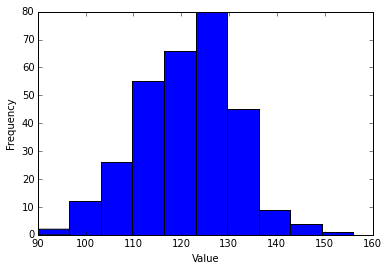

valor medio de la cantidad de veces que se observa X=18: 121.026666667
es decir, P( X=18 | r=0.5 ) = 0.121026666667
desviacion estandar 9.93273823721


In [2]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

#ahora repitamos el calculo del codigo anterior varias veces para tener una distribucion de la cantidad de veces que se observa X=18

P_same18=[]
for j in range (300):
    same=[]
    for i in range(1000):
            x = np.random.random(33)
            s=0
            for n in range(33):
                if x[n] < 0.5:
                    s=s+1    
            same.append(s)
    same = np.array(same)
    index = (same > 17) & (same < 19)
    same18 = same[index]
    P_same18.append(len(same18))
    
                
x = np.array(P_same18)
plt.hist(P_same18)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

print "valor medio de la cantidad de veces que se observa X=18:", np.mean(P_same18)
print "es decir, P( X=18 | r=0.5 ) =", np.mean(P_same18)/1000.
print "desviacion estandar",np.std(P_same18)



# Código utilizado para resolver las secciones c) y d) del Problema 2 (Tarea 1)

Populating the interactive namespace from numpy and matplotlib
Integral de P(r) en [0,1] = 0.99999


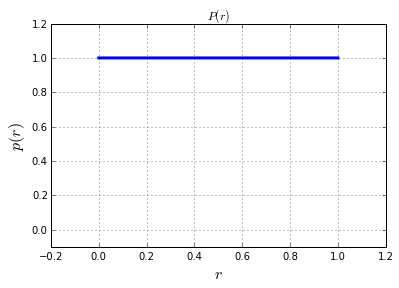

In [31]:
import matplotlib.pyplot as plt
import numpy as np
%pylab inline


#Definimos P(r)~Uniforme(0,1) 

t = np.arange(0.00, 1.0000, 0.00001)
s = np.zeros(len(t))+1.

#Calculamos la integral de P(r) entre 0 y 1

print 'Integral de P(r) en [0,1] =',np.trapz(s,t)

#Graficamos la distribucion P(r)~Uniforme(0,1)

plt.plot(t, s,linewidth=3)

plt.xlim(-0.2, 1.2)  
plt.ylim(-0.1, 1.2)

plt.xlabel('$r$',size=16)
plt.ylabel('$p(r)$',size=16)
plt.title('$P(r)~Uniforme(0,1)$')
plt.grid(True)

plt.show()

In [32]:
#Tarea para calcular el coeficiente binomial/combinatoria (n,k)
import scipy
from scipy import special
print scipy.special.binom(33,18)

1037158320.0


In [33]:
#Calculemos el denominador de P(r|X)

def h(x):
    return (x**18)*((1-x)**15)

t = np.arange(0.00, 1.0, 0.00001)
s = h(t)

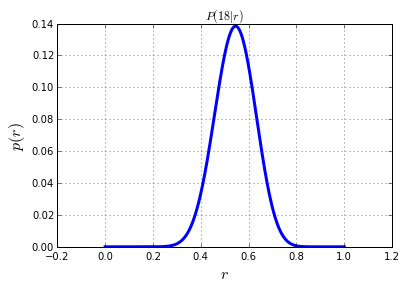

In [34]:
#Graficamos P(18|r)
plt.plot(t, s*scipy.special.binom(33,18),linewidth=3)

plt.xlim(-0.2, 1.2)  
#plt.ylim(-0.1, 1.2)

plt.xlabel('$r$',size=16)
plt.ylabel('$p(r)$',size=16)
plt.title('$P(18|r)$')
plt.grid(True)

plt.show()

In [35]:
#Calculamos la integral de P(18|r) entre 0 y 1
print 'Integral de P(18|r) en [0,1] =',np.trapz(s,t)*scipy.special.binom(33,18)
print 'Integral de P(18|r) en [0,1] (dividido por el coef. binomial(33,18) ) =',np.trapz(s,t)

Integral de P(18|r) en [0,1] = 0.0294117647059
Integral de P(18|r) en [0,1] (dividido por el coef. binomial(33,18) ) = 2.83580280259e-11


In [36]:
#Definimos P(r|X) (P(r|18) en este caso)
def p(x):
    return ((x**18)*((1-x)**15))/(np.trapz(s,t))

l = np.arange(0.00, 1.0, 0.00001)
m = p(l)



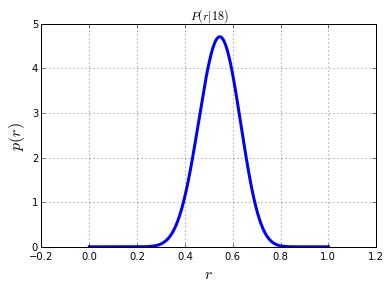

In [37]:
#Graficamos P(r|18)

plt.plot(l, m,linewidth=3)


plt.xlim(-0.2, 1.2)  
#plt.ylim(-0.1, 1.2)

plt.xlabel('$r$',size=16)
plt.ylabel('$p(r)$',size=16)
plt.title('$P(r|18)$')
plt.grid(True)

plt.show()

maximum CDF = 1.0


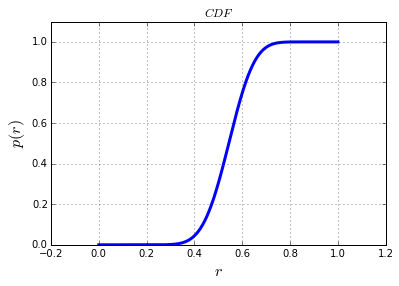

In [50]:
#def int_p(x):
#    ll = np.arange(0.00, x, 0.00001)
#    mm = p(ll)
#    return np.trapz(mm,ll)

#l2 = np.arange(0.00, 1.0, 0.00001)
#m2 = int_p(l2)

l1 = np.arange(0.00, 1.0, 0.00001)
m1 = p(l1)

#Calculamos la CDF usando np.cumsum y dividiendo por el nro 
#de intervalos en los que dividimos al eje x en [0,1]

mc=np.cumsum(m1)/(1/0.00001)

plt.plot(l1, mc,linewidth=3)
print 'maximum CDF =',max(mc)

plt.xlim(-0.2, 1.2)  
plt.ylim(0., 1.1)

plt.xlabel('$r$',size=16)
plt.ylabel('$p(r)$',size=16)
plt.title('$CDF$')
plt.grid(True)

plt.show()

In [40]:
print 'Integral de P(r|X) en [0,1] =',np.trapz(m,l)

Integral de P(r|X) en [0,1] = 1.0


In [11]:
#Calculamos P(r>0.5|X)

k = np.arange(0.50, 1.00, 0.001)
Ho = p(k)
print 'Probabilidad de que dado X=18, r>0.5 =', np.trapz(Ho,k)

Probabilidad de que dado X=18, r>0.5 = 0.696202266752


In [12]:
#Calculamos P(r<0.5|X)

k = np.arange(0.00, 0.50, 0.001)
Ho = p(k)
print 'Probabilidad de que dado X=18, r<0.5 =', np.trapz(Ho,k)

Probabilidad de que dado X=18, r<0.5 = 0.299704948575


In [21]:
#Definimos la derivada de P(r|X) (dP(r|18)/dr en este caso) para calcular el maximo
def dp(x):
    return (18*(x**17)*((1-x)**15)-15*(x**18)*((1-x)**14))/(np.trapz(s,t))

l = np.arange(0.30, 0.80, 0.000001)
m = dp(l)

filt= (m<0.001)&(m>-0.001)
m_filt=m[filt]
l_filt=l[filt]
print len(l_filt), l_filt, m_filt

4 [ 0.545453  0.545454  0.545455  0.545456] [ 0.000968    0.00034165 -0.0002847  -0.00091105]


In [22]:
print 0.696202266752+0.299704948575


0.995907215327
